In [1]:
from graph import get_graph

/Users/yegyanathanv/anaconda3/envs/chatapp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import configparser
# Load configuration
config = configparser.ConfigParser()
config.read("../config/config.ini")

['../config/config.ini']

In [3]:
UPLOAD_DIR = config["directory"]["upload"]
SQLITE_URI = config["sqlite"]["uri"]

K = int(config["milvus"]["k"])
SEARCH_DEPTH = config["tavily"]["search_depth"]
INCLUDE_ANSWER = config.getboolean("tavily", "include_answer")
INCLUDE_RAW_CONTENT = config.getboolean("tavily", "include_raw_content")
INCLUDE_IMAGES = config.getboolean("tavily", "include_images")
MAX_RESULTS = config["tavily"]["max_results"]
MODEL_NAME = config["llm"]["name"]
TEMPERATURE = float(config["llm"]["temperature"])

EMBED_MODEL_NAME = config["embedding"]["name"]
MAX_TOKENS = config["docling"]["max_tokens"]

# Initialize the graph with parameters
graph = get_graph(
    k=K, 
    search_depth=SEARCH_DEPTH, 
    include_answer=INCLUDE_ANSWER, 
    include_raw_content=INCLUDE_RAW_CONTENT, 
    include_images=INCLUDE_IMAGES, 
    max_result=MAX_RESULTS, 
    model_name=MODEL_NAME, 
    temperature=TEMPERATURE, 
    sqlite_url=SQLITE_URI
)

2025-02-26 08:22:44,855 | INFO | graph | Initializing LangGraph Workflow...
2025-02-26 08:22:44,858 | INFO | graph | Adding nodes to the graph...
2025-02-26 08:22:44,862 | INFO | graph | Graph structure successfully defined.
2025-02-26 08:22:44,866 | INFO | graph | Graph compilation completed successfully.


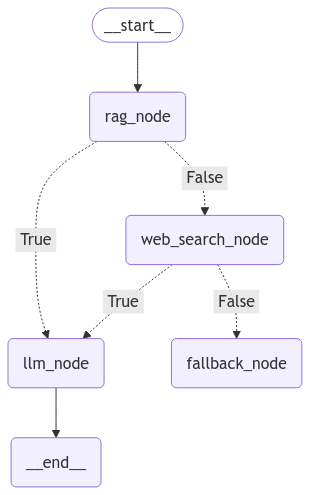

In [4]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)